# Importing numerical data from files

The data you will use to train/test your machine learning models can be stored in multiple formats. Here, we'll look at three widely used formats: data.txt (or .csv), data.mat and data.npy.

### Open text files (.txt, .csv, ...)

There exist very useful python modules in order to import data stored in files on disks. For text files such as .csv files, the most common module is the one named 'csv'. So to read a file, simply import the csv module at the begining of your .py file/jupyter notebook and use the code in the next cells. 

In [4]:
import csv

Import data in a generic way.

In [5]:
with open('work_summary.xlsx',mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',') # open file in an object that iterates over lines in the file and considers ',' as the separator between line elements.
    line_count = 0
    
    for row in csv_reader: # reads file line by line to process content
        # row is a list of values (e.g. row = ['Hello', 'World', '!'] corrsponds to a line 'Hello,World,!' in the csv file) 
      
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            
        else:
            # do something with the current row.
            print(f'\t In row {line_count} : {row[0]} is the first item , {row[1]} is the second, and {row[2]} is the third.')
            line_count += 1
            
    print(f'Processed {line_count} lines.')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 10: invalid continuation byte

Import data in a dictionary.

In [2]:
with open('path/to/textfile.txt',mode='r') as csv_file:
  
    col_Names = ["Col1","Col2","Col3"]
    csv_reader = csv.DictReader(csv_file,fieldNames=col_Names) # open file in an object that iterates over lines in the file.
    
    # csv_reader = csv.DictReader(csv_file) # Same thing, but considers the elements in the first row as the column names
    
    line_count = 0
    
    for row in csv_reader: # reads file line by line to process content
        # row is a dictionary of values (e.g. row = {"Col1":'Hello', "Col2":'World', "Col3":'!'} corrsponds to a line 'Hello,World,!' in the csv file) 
      
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            
        else:
            # do something with the current row.
            print(f'\t In row {line_count} : {row["Col1"]} is the first item , {row["Col2"]} is the second, and {row["Col3"]} is the third...')
            line_count += 1
            
    print(f'Processed {line_count} lines.')

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/textfile.txt'

### Import data in .mat files

The 'scipy' module contains lots of functions commonly used for scientific and mathematic purposes. It also includes compatibility with MATLAB's .mat file format and allows to load their content to process it in a python environment.

In [0]:
import scipy.io 

To load a .mat file, simply store the result of the well-named function **loadmat** (give it the path of the file you want) in a variable. 

In [0]:
data = scipy.io.loadmat('path/to/file.mat')  # loads the data and returns it in a dictionary
data # Print the data dictionary

Then, the variable can be manipulated to extract data parts that are needed, and separate them in different variables.

In [0]:
X = data['X']                 # Store the element named 'X' inside the .mat file in a new variable X.
version = data['__version__'] # Metadata stored in the .mat file can also be accessed the same way.

print(version)

If the needed data is a sub-part of an object in the .mat file, no problem. As the variable X in the previious cell is a python structure. Its content can be accessed as any python structure.
For Example, the next cell shows how to select extracted data columnwise:

In [0]:
firstCol,second_col = X[:,0],X[:,1]

### Import data from .npy files

The .npy format is the data format that is used by python's most popular numerical computation library: Numpy (you'll learn about it in the next chapter of this tutorial). 

In [0]:
import numpy as np

In [0]:
np.load('path/to/file.npy')

# Numerical computation


Numpy is the standard library for vector and matrix manipulation. It provides many functions that you will recognize from Matlab and R. By the way, here are two helpful webpages that translate [MATLAB](http://mathesaurus.sourceforge.net/matlab-numpy.html) or [R](http://mathesaurus.sourceforge.net/r-numpy.html) functions to numpy functions.



In [24]:
import numpy as np

The numpy websites provide a very complete tutorial [here](https://docs.scipy.org/doc/numpy/user/quickstart.html), that we recommend you to read. To test your knowledge, we provide a small exercice for you to solve using Numpy.

Solve the following system of equations:


```
x+y+z = 2
6x-4y+5z = 31
5x+2y+2z = 13
```

Using the np.solve function:

In [25]:
# insert code here
A = np.array([[1, 1, 1],
              [6, -4, 5],
              [5, 2, 2]])
y = np.array([[2], [31], [13]])
x = np.linalg.solve(A, y)
print(x)

[[ 3.]
 [-2.]
 [ 1.]]


Without using the np.solve function:

In [0]:
# insert code here
# No, I am too lazy...

The right solution is (3,-2,1). Got it? :)

# Visualizing data

The most common module to display a graph in python is the **matplotlib.pyplot** module. It contains several functions that allow you to plot nearly anything you can think of (related to data and graphs of course!). So at first, import it at the beginning of your code.

In [16]:
import matplotlib.pyplot as plt

Then, well it's up to you! The simplest graph is done by calling the function **plot()**. Give it a list of numerical values and...Voila! This shows a nice linear interpolation between the values you provided. Please, note that the index of the values is used as x-coordinate when a single data parameter is given.

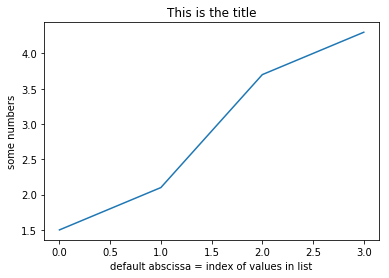

In [17]:
X = [1.5, 2.1, 3.7, 4.3]
plt.plot(X) # plots the given data.
plt.title('This is the title')                           # Optional, but a graph is always prettier with a title.
plt.ylabel('some numbers')                               # Optional, but a graph is always prettier with a label on its y-axis.
plt.xlabel('default abscissa = index of values in list') # Optional, but a graph is always prettier with a label on its x-axis.
plt.show()

In order to define a specific set of x-coordinates, you should provide such coordinates along with the data. You can do so by calling Numpy's **linspace()** function.

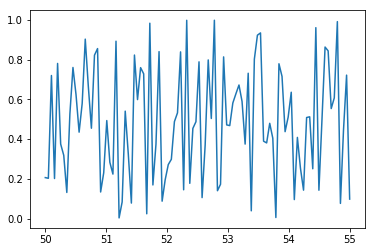

In [20]:
import random        
import numpy as np

# plt.clf()  # clears the current figure

n = 100
X = np.linspace(50,55,n)                # define n x-coordinates for our data linearly chosen in the interval [50,55[
Y = [random.random() for i in range(n)] # creates n random numbers in [0,1[ interval.

plt.plot(X,Y)                           # X and Y must have the same length

Several lists can be plotted in the same figure, even if lists have different lengths. 

Do not forget to add a legend if you do not want to lose your reader! To do so, give a name to each one of the data samples you display by using the 'label' parameter, and call the function **legend()** before showing the plot.

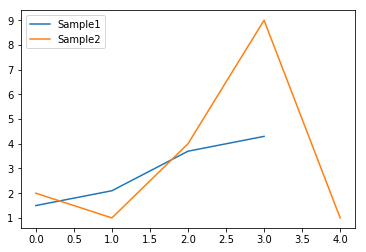

In [26]:
plt.plot([1.5, 2.1, 3.7, 4.3], label = 'Sample1')
plt.plot([2.0, 1, 4, 9, 1], label = 'Sample2')
plt.legend(loc = 'upper left')
plt.show()

The function **plot()** only draws lines, but scatter plots can also be drawn by using the funtion **scatter()**.

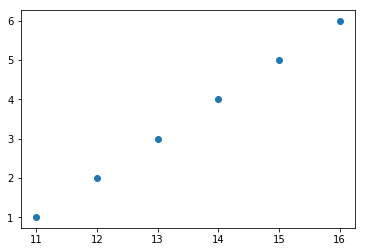

In [0]:
X = [11,12,13,14,15,16]
Y = [1,2,3,4,5,6]

plt.scatter(X,Y) # X and Y must have the same dimensions 

Want to have a single figure with several plots? No problem! The subplot functions are here for you!

*   Define the shape of your figure with **subplot()**
*   Define the general title of your figure with **suptitle()**
*   Define the data to show for each figure axis **plot()**
*   Define the title of each axis (! axis == one subplot !) with **set_title()**
*   Define the axis (! axis == x-axis or y-axis !) labels of your figure with **set_xlabel()**, **set_ylabel()**

It's possible that labels and figures overlap, but no worries you can correct it by modifying **plt.rcParams["figure.figsize"]** .



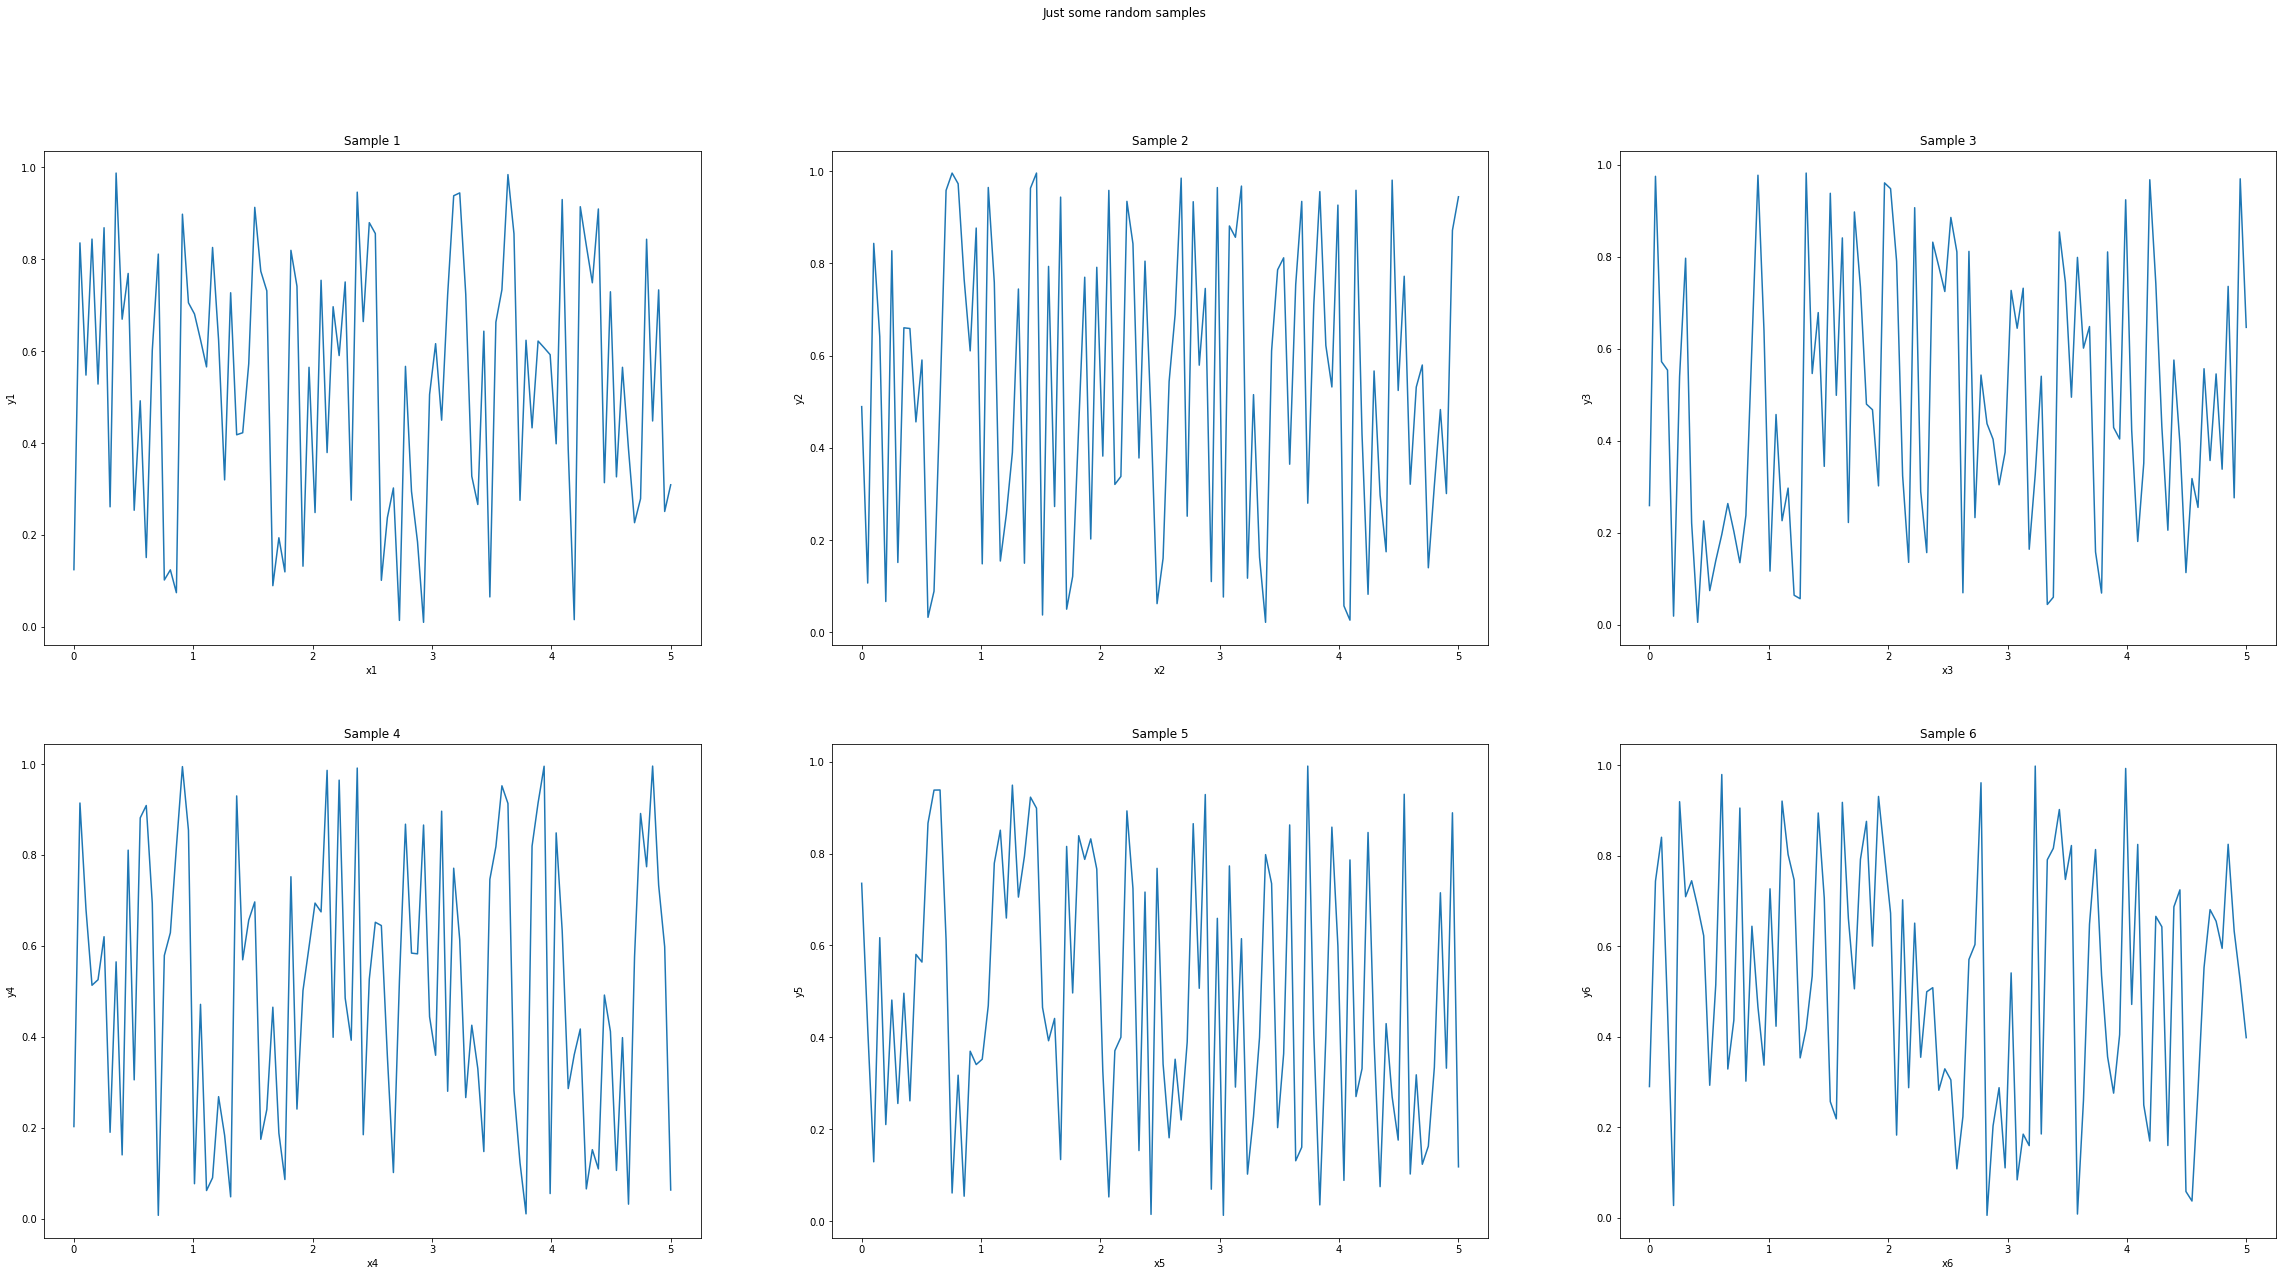

In [30]:
import random
import numpy as np

n = 100
X = np.linspace(0,5,n)                # define the abscissa interval
Y0 = [random.random() for i in range(n)]
Y1 = [random.random() for i in range(n)]
Y2 = [random.random() for i in range(n)]
Y3 = [random.random() for i in range(n)]
Y4 = [random.random() for i in range(n)]
Y5 = [random.random() for i in range(n)]

fig, axs = plt.subplots(nrows=2,ncols=3)
fig.suptitle('Just some random samples')

axs[0,0].plot(X, Y0)
axs[0,0].set_title('Sample 1')
axs[0,0].set_ylabel('y1')
axs[0,0].set_xlabel('x1')

axs[0,1].plot(X, Y1)
axs[0,1].set_title('Sample 2')
axs[0,1].set_ylabel('y2')
axs[0,1].set_xlabel('x2')

axs[0,2].plot(X, Y2)
axs[0,2].set_title('Sample 3')
axs[0,2].set_ylabel('y3')
axs[0,2].set_xlabel('x3')

axs[1,0].plot(X, Y3)
axs[1,0].set_title('Sample 4')
axs[1,0].set_ylabel('y4')
axs[1,0].set_xlabel('x4')

axs[1,1].plot(X, Y4)
axs[1,1].set_title('Sample 5')
axs[1,1].set_ylabel('y5')
axs[1,1].set_xlabel('x5')

axs[1,2].plot(X, Y5)
axs[1,2].set_title('Sample 6')
axs[1,2].set_ylabel('y6')
axs[1,2].set_xlabel('x6')

#plt.rcParams["figure.figsize"] = (40,20) # remove to see overlapping subplots

plt.show()

Figures can be saved in files on disk.

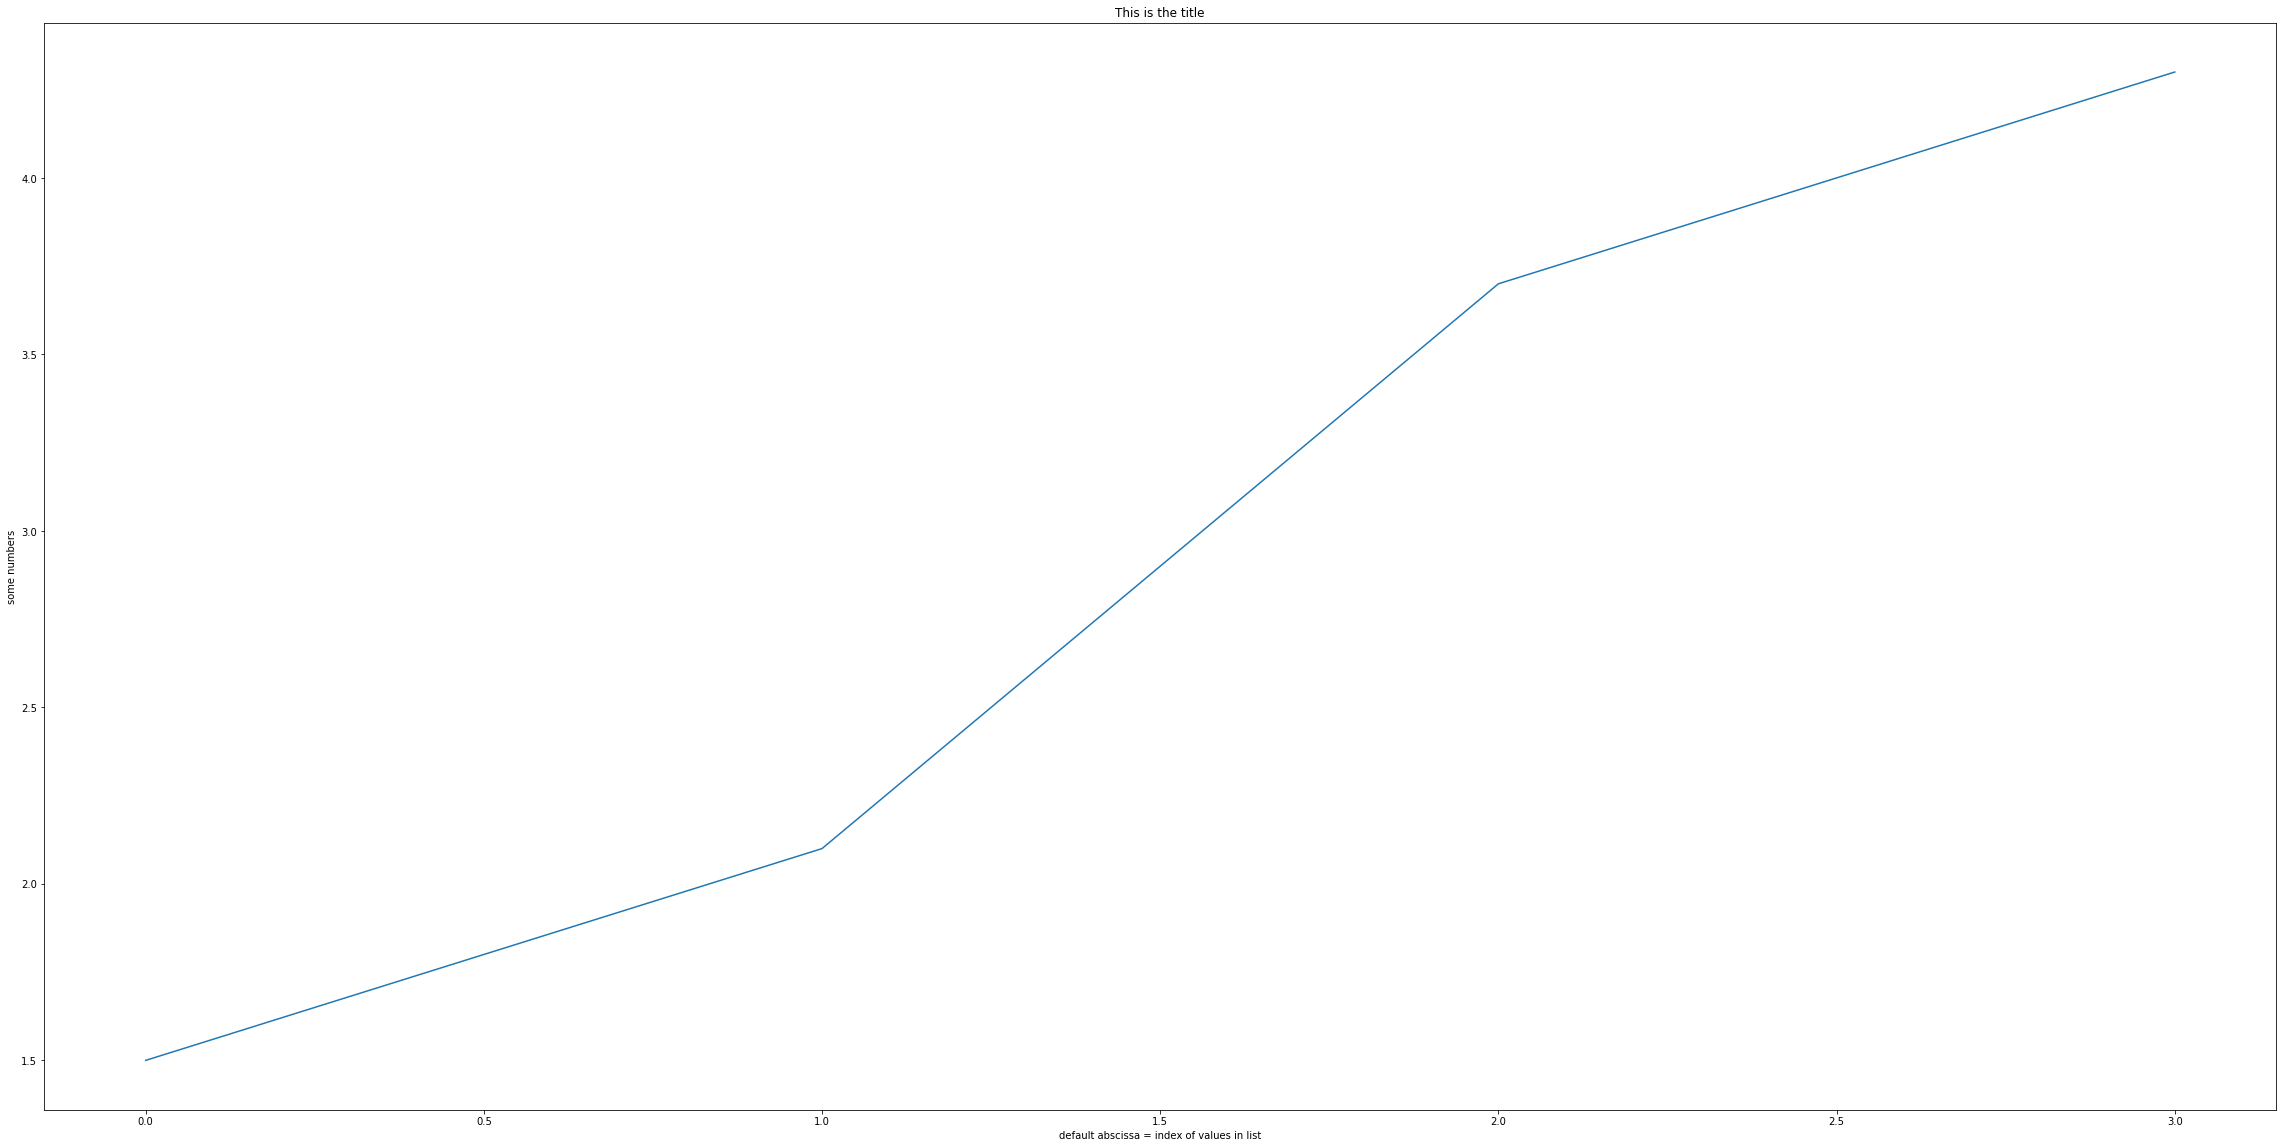

In [31]:
X = [1.5, 2.1, 3.7, 4.3]
plt.plot(X)
plt.title('This is the title')
plt.ylabel('some numbers')
plt.xlabel('default abscissa = index of values in list')
plt.show()

plt.savefig('MyFigure.pdf')

# Saving results to files

Saving files is done by using functions in the same modules as earlier: **csv** for textfiles, **scipy.io** for .mat files and **numpy** for .npy files.

Dump data in a generic way.

In [0]:
with open('path/to/file.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['Hello', 'World', '!'])

Dump data stored in dictionaries.

In [0]:
with open('path/to/file2.csv', mode='w') as file:
    fieldnames = ['Col1', 'Col2', 'Col3']
    writer = csv.DictWriter(file, fieldnames=fieldnames) # fieldnames is mandatory to write from a dictionary

    writer.writeheader()
    writer.writerow({'Col1': 'Hello', 'Col2': 'World', 'Col3': '!'}) # Dump first dictionary
    writer.writerow({'Col1': 'How', 'Col2': 'are', 'Col3': 'you?'})  # Dump second dictionary

Dump data in .mat binary files.

In [0]:
filename = 'path/to/new_file.mat'
data_dict = {'X': [1,2,3], 'Y': [4,5,6]}

scipy.io.savemat(filename, data_dict, appendmat=False) # appendmat: False -> overwrites data present in new_file; 
                                                       # True -> appends dictionaries in file if already exists, creates it otherwise.

Dump to .npy files

In [0]:
np.save('path/to/new_file.npy',x) # x is an numpy array containing your data